### 1️⃣ Load Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

pd.set_option('display.max_columns', None)

### 2️⃣ Load Cleaned Dataset

In [2]:
df = pd.read_csv("cleaned_train_data.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,65.6344,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


### 3️⃣ Split Features & Target

In [3]:
X = df.drop('Survived', axis=1)
y = df['Survived']

### 4️⃣ Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 5️⃣ Feature Scaling (Important!)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6️⃣ Model Evaluation Function (Reusable)

In [6]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

### 7️⃣ Build & Evaluate Classification Models

#### 🔹 7.1 Logistic Regression

In [7]:
log_reg = LogisticRegression(max_iter=1000)

log_results = evaluate_model(
    log_reg, X_train_scaled, X_test_scaled, y_train, y_test
)
log_results

{'Accuracy': 0.7932960893854749,
 'Precision': 0.7666666666666667,
 'Recall': 0.6666666666666666,
 'F1 Score': 0.7131782945736435}

#### 🔹 7.2 K-Nearest Neighbors (KNN)

In [8]:
knn = KNeighborsClassifier(n_neighbors=7)

knn_results = evaluate_model(
    knn, X_train_scaled, X_test_scaled, y_train, y_test
)
knn_results

{'Accuracy': 0.7932960893854749,
 'Precision': 0.7666666666666667,
 'Recall': 0.6666666666666666,
 'F1 Score': 0.7131782945736435}

#### 🔹 7.3 Naive Bayes

In [9]:
nb = GaussianNB()

nb_results = evaluate_model(
    nb, X_train_scaled, X_test_scaled, y_train, y_test
)
nb_results

{'Accuracy': 0.7541899441340782,
 'Precision': 0.6666666666666666,
 'Recall': 0.7246376811594203,
 'F1 Score': 0.6944444444444444}

#### 🔹 7.4 Decision Tree Classifier

In [10]:
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt_results = evaluate_model(
    dt, X_train, X_test, y_train, y_test
)
dt_results

{'Accuracy': 0.7653631284916201,
 'Precision': 0.7547169811320755,
 'Recall': 0.5797101449275363,
 'F1 Score': 0.6557377049180327}

#### 🔹 7.5 Random Forest Classifier

In [11]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf_results = evaluate_model(
    rf, X_train, X_test, y_train, y_test
)
rf_results

{'Accuracy': 0.7988826815642458,
 'Precision': 0.8,
 'Recall': 0.6376811594202898,
 'F1 Score': 0.7096774193548387}

#### 🔹 7.6 Gradient Boosting Classifier

In [12]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

gb_results = evaluate_model(
    gb, X_train, X_test, y_train, y_test
)
gb_results

{'Accuracy': 0.7877094972067039,
 'Precision': 0.7818181818181819,
 'Recall': 0.6231884057971014,
 'F1 Score': 0.6935483870967742}

#### 🔹 7.7 Support Vector Machine (SVM)

In [13]:
svm = SVC(kernel='rbf', probability=True)

svm_results = evaluate_model(
    svm, X_train_scaled, X_test_scaled, y_train, y_test
)
svm_results

{'Accuracy': 0.8100558659217877,
 'Precision': 0.8181818181818182,
 'Recall': 0.6521739130434783,
 'F1 Score': 0.7258064516129032}

###  8️⃣ Compare All Models

In [14]:
results_df = pd.DataFrame({
    "Logistic Regression": log_results,
    "KNN": knn_results,
    "Naive Bayes": nb_results,
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gb_results,
    "SVM": svm_results
}).T

results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.793296,0.766667,0.666667,0.713178
KNN,0.793296,0.766667,0.666667,0.713178
Naive Bayes,0.754190,0.666667,0.724638,0.694444
Decision Tree,0.765363,0.754717,0.579710,0.655738
Random Forest,0.798883,0.800000,0.637681,0.709677
Gradient Boosting,0.787709,0.781818,0.623188,0.693548
SVM,0.810056,0.818182,0.652174,0.725806


### 9️⃣ Visual Model Comparison

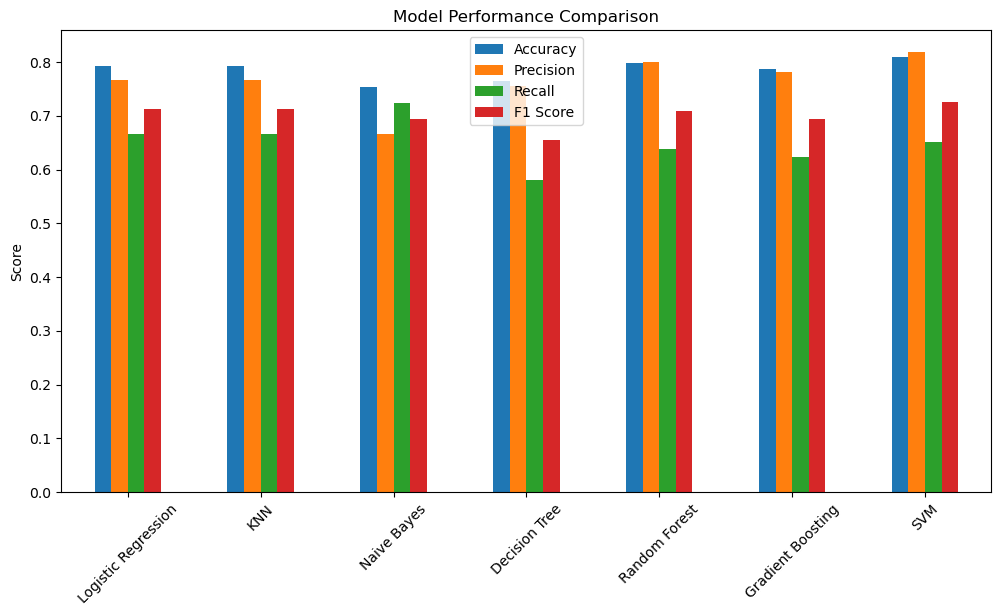

In [15]:
results_df.plot(kind='bar', figsize=(12,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

### 🔟 Cross-Validation (Important for Interviews)

In [16]:
cv_scores = cross_val_score(
    rf, X_train, y_train, cv=5, scoring='accuracy'
)

print("Random Forest CV Accuracy:", cv_scores.mean())

Random Forest CV Accuracy: 0.8245247710036441


### 1️⃣1️⃣ Confusion Matrix (Best Model)

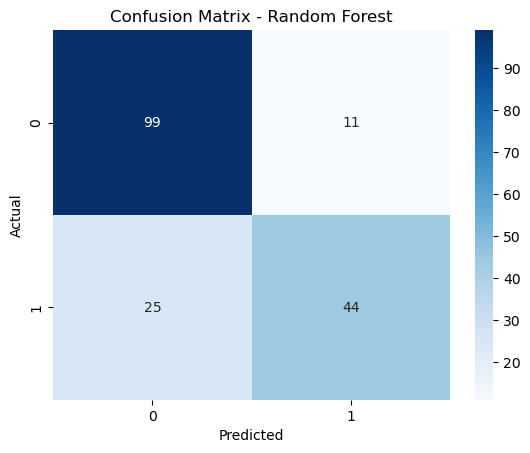

In [17]:
best_model = rf
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 1️⃣2️⃣ Classification Report

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [20]:
### 1️⃣3️⃣ Final Observations (Markdown Section)

#### ✅ Model Comparison Summary
- Tree-based models (Random Forest, Gradient Boosting) performed best
- Logistic Regression provided a strong baseline
- SVM performed well but required feature scaling
- Naive Bayes was fast but less accurate

#### 🏆 Best Model
Random Forest Classifier due to strong accuracy and stability